### Predictions

### Imports

In [33]:
import os
import pandas as pd
import numpy as np

import os
import re

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib.pyplot import figure
import datetime
from datetime import timedelta
from pandas.api.types import is_datetime64_any_dtype as is_datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.dummy import DummyClassifier
import collections, numpy
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

## Important: 

* Modify features to be the mean of past 3 games

### Set paths

In [34]:
data_clean = 'data/clean'
parent = '/Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/final_project'

datapath_clean = os.path.join(parent, data_clean)
os.chdir(datapath_clean)

## Read in data

In [35]:
df = pd.read_csv('model.csv', index_col = 'game')

In [36]:
df

,game_t1,game_t2,team_id_t1,team_id_t2,catch_mean_t1,catch_mean_t2,catch_sum_t1,catch_sum_t2,catch_std_t1,catch_std_t2,...,game_last_t2,event_type_last_t1,event_type_last_t2,opponent_clean_last_t1,opponent_clean_last_t2,our_score_end_of_point_max_t1,our_score_end_of_point_max_t2,their_score_end_of_point_max_t1,their_score_end_of_point_max_t2,win_t1
game,,,,,,,,,,,,,,,,,,,,,
0_14_107,0_14_107,0_14_107,0,14,11.650000,13.300000,233.0,266.0,10.534530,12.290775,...,0_14_107,Offense,Offense,nashvillenightwatch,atlantahustle,37.0,27.0,27.0,37.0,1
0_14_118,0_14_118,0_14_118,0,14,12.500000,12.684211,250.0,241.0,9.185228,7.895517,...,0_14_118,Offense,Offense,nashvillenightwatch,atlantahustle,31.0,19.0,18.0,31.0,1
0_14_140,0_14_140,0_14_140,0,14,13.850000,0.100000,277.0,1.0,13.437085,0.316228,...,0_14_140,Offense,Offense,nashvillenightwatch,atlantahustle,27.0,22.0,22.0,27.0,1
0_14_157,0_14_157,0_14_157,0,14,14.100000,13.700000,282.0,274.0,10.808866,16.921180,...,0_14_157,Offense,Offense,nashvillenightwatch,atlantahustle,18.0,16.0,17.0,15.0,1
0_14_176,0_14_176,0_14_176,0,14,12.000000,13.600000,240.0,272.0,6.521220,17.578096,...,0_14_176,Offense,Offense,nashvillenightwatch,atlantahustle,24.0,21.0,20.0,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_8_203,7_8_203,7_8_203,7,8,14.866667,10.850000,223.0,217.0,19.386544,11.672167,...,7_8_203,Offense,Offense,indianapolisalleycats,detroitmechanix,16.0,19.0,19.0,16.0,0
7_8_28,7_8_28,7_8_28,7,8,16.588235,10.800000,282.0,216.0,16.431900,9.860074,...,7_8_28,Offense,Offense,indianapolisalleycats,detroitmechanix,21.0,29.0,29.0,21.0,0
7_8_75,7_8_75,7_8_75,7,8,14.882353,11.550000,253.0,231.0,13.564118,9.588782,...,7_8_75,Offense,Offense,indianapolisalleycats,detroitmechanix,24.0,29.0,29.0,24.0,0


### correlation heatmap

In [37]:
#fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w')
#sns.heatmap(df.corr().abs(), cmap="YlGnBu", linewidths= 10)
#annot = True,

In [38]:
#sns.pairplot(df, hue='win_t1')

## Drop null values

In [39]:
df.shape

(720, 145)

In [40]:
df= df.dropna(axis=1)

In [41]:
df.shape

(720, 140)

## Train-test split

In [42]:
df, df_test = train_test_split(df, test_size=0.2, random_state = 30)

## Scale data

col_transformer_scale = ColumnTransformer(transformers=[
    ('age_knn_scaled', MinMaxScaler(), ['age_knn']),
    ('fare_scaled', MinMaxScaler(), ['fare'])]# also include the columns not transformed in the output
)

scale_train = pd.DataFrame(col_transformer_scale.fit_transform(df_train), columns=col_transformer_scale.get_feature_names_out()) 

## Baseline model

In [43]:
m = LogisticRegression(max_iter=1000)

In [44]:
df.columns[100:150]

Index(['catch_perc_mean_t1', 'catch_perc_mean_t2', 'catch_perc_sum_t1',
       'catch_perc_sum_t2', 'catch_perc_std_t2', 'team_id_last_t1',
       'team_id_last_t2', 'game_id_str_last_t1', 'game_id_str_last_t2',
       'game_id_last_t1', 'game_id_last_t2', 'team_last_t1', 'team_last_t2',
       'opponent_id_last_t1', 'opponent_id_last_t2', 'date_id_last_t1',
       'date_id_last_t2', 'line_last_t1', 'line_last_t2', 'datetime_last_t1',
       'datetime_last_t2', 'act_player_id_last_t1', 'act_player_id_last_t2',
       'season_last_t1', 'season_last_t2', 'opponent_last_t1',
       'opponent_last_t2', 'ranking2019_last_t1', 'ranking2019_last_t2',
       'game_last_t1', 'game_last_t2', 'event_type_last_t1',
       'event_type_last_t2', 'opponent_clean_last_t1',
       'opponent_clean_last_t2', 'our_score_end_of_point_max_t1',
       'our_score_end_of_point_max_t2', 'their_score_end_of_point_max_t1',
       'their_score_end_of_point_max_t2', 'win_t1'],
      dtype='object')

##### Define X and y for baseline model

In [45]:
# Make sure to not include clearly winning related variables: pulls, goals, assists, turnovers
# Only take std and mean (sum not great for the model)

In [46]:
X= df[['catch_mean_t1',
       'catch_mean_t2','catch_std_t1',
       'catch_std_t2', 'pass_perc_mean_t1', 'pass_perc_mean_t2',
       'pass_perc_std_t1',
       'pass_perc_std_t2', 'drop_mean_t1', 'drop_mean_t2', 'drop_std_t1', 'drop_std_t2', 'throw_mean_t1', 'throw_mean_t2',
       'throw_std_t1', 'throw_std_t2', 'dropped_throw_mean_t1',
       'dropped_throw_mean_t2', 'dropped_throw_std_t1', 'dropped_throw_std_t2', 'stall_mean_t1',
       'stall_mean_t2', 'stall_std_t1',
       'stall_std_t2', 'miscpenalty_mean_t1', 'miscpenalty_mean_t2', 'miscpenalty_std_t1',
       'miscpenalty_std_t2', 'throws_all_mean_t1', 'throws_all_mean_t2', 'throws_all_std_t1',
       'throws_all_std_t2', 'd_mean_t1', 'd_mean_t2', 'd_sum_t1', 'd_sum_t2',
       'd_std_t1', 'd_std_t2', 'throwaway_mean_t1', 'throwaway_mean_t2','throwaway_std_t1',
       'throwaway_std_t2','catch_perc_mean_t1', 'catch_perc_mean_t2', 'catch_perc_std_t2']]


X_big = df[['catch_mean_t1',
       'catch_mean_t2', 'catch_sum_t1', 'catch_sum_t2', 'catch_std_t1',
       'catch_std_t2', 'pass_perc_mean_t1', 'pass_perc_mean_t2',
       'pass_perc_sum_t1', 'pass_perc_sum_t2', 'pass_perc_std_t1',
       'pass_perc_std_t2', 'drop_mean_t1', 'drop_mean_t2', 'drop_sum_t1',
       'drop_sum_t2', 'drop_std_t1', 'drop_std_t2', 'throw_mean_t1', 'throw_mean_t2', 'throw_sum_t1',
       'throw_sum_t2', 'throw_std_t1', 'throw_std_t2', 'dropped_throw_mean_t1',
       'dropped_throw_mean_t2', 'dropped_throw_sum_t1',
       'dropped_throw_sum_t2', 'dropped_throw_std_t1', 'dropped_throw_std_t2', 'stall_mean_t1',
       'stall_mean_t2', 'stall_sum_t1', 'stall_sum_t2', 'stall_std_t1',
       'stall_std_t2', 'miscpenalty_mean_t1', 'miscpenalty_mean_t2',
       'miscpenalty_sum_t1', 'miscpenalty_sum_t2', 'miscpenalty_std_t1',
       'miscpenalty_std_t2', 'turnover_mean_t1', 'turnover_mean_t2',
       'turnover_sum_t1', 'turnover_sum_t2', 'turnover_std_t1',
       'turnover_std_t2', 'goal_mean_t1', 'goal_mean_t2', 'goal_sum_t1',
       'goal_sum_t2', 'goal_std_t1', 'goal_std_t2', 'pull_mean_t1',
       'pull_mean_t2', 'pull_sum_t1', 'pull_sum_t2', 'pull_std_t1',
       'pull_std_t2', 'throws_all_mean_t1', 'throws_all_mean_t2',
       'throws_all_sum_t1', 'throws_all_sum_t2', 'throws_all_std_t1',
       'throws_all_std_t2', 'd_mean_t1', 'd_mean_t2', 'd_sum_t1', 'd_sum_t2',
       'd_std_t1', 'd_std_t2', 'throwaway_mean_t1', 'throwaway_mean_t2',
       'throwaway_sum_t1', 'throwaway_sum_t2', 'throwaway_std_t1',
       'throwaway_std_t2','catch_perc_mean_t1', 'catch_perc_mean_t2', 'catch_perc_sum_t1',
       'catch_perc_sum_t2', 'catch_perc_std_t2']]


y = df['win_t1']



X_test= df_test[['catch_mean_t1',
       'catch_mean_t2','catch_std_t1',
       'catch_std_t2', 'pass_perc_mean_t1', 'pass_perc_mean_t2',
       'pass_perc_std_t1',
       'pass_perc_std_t2', 'drop_mean_t1', 'drop_mean_t2', 'drop_std_t1', 'drop_std_t2', 'throw_mean_t1', 'throw_mean_t2',
       'throw_std_t1', 'throw_std_t2', 'dropped_throw_mean_t1',
       'dropped_throw_mean_t2', 'dropped_throw_std_t1', 'dropped_throw_std_t2', 'stall_mean_t1',
       'stall_mean_t2', 'stall_std_t1',
       'stall_std_t2', 'miscpenalty_mean_t1', 'miscpenalty_mean_t2', 'miscpenalty_std_t1',
       'miscpenalty_std_t2', 'throws_all_mean_t1', 'throws_all_mean_t2', 'throws_all_std_t1',
       'throws_all_std_t2', 'd_mean_t1', 'd_mean_t2', 'd_sum_t1', 'd_sum_t2',
       'd_std_t1', 'd_std_t2', 'throwaway_mean_t1', 'throwaway_mean_t2','throwaway_std_t1',
       'throwaway_std_t2','catch_perc_mean_t1', 'catch_perc_mean_t2', 'catch_perc_std_t2']]

y_test = df_test['win_t1']

In [47]:
X.shape, y.shape

((576, 45), (576,))

In [48]:
X= X.dropna(axis=1)

In [49]:
m.fit(X, y)

LogisticRegression(max_iter=1000)

In [50]:
m.score(X, y)

0.90625

In [51]:
m.coef_[0][0:20]

array([ 0.03274038,  0.31192846,  0.08895358,  0.25424231,  0.21205345,
       -0.13233204, -0.04778864, -0.08048849, -1.29791087,  1.25558314,
       -0.97339731,  1.28368416, -0.15814138, -0.18695018, -0.53701356,
       -0.07279185, -1.26965044,  1.24073095, -1.28847557,  1.4921654 ])

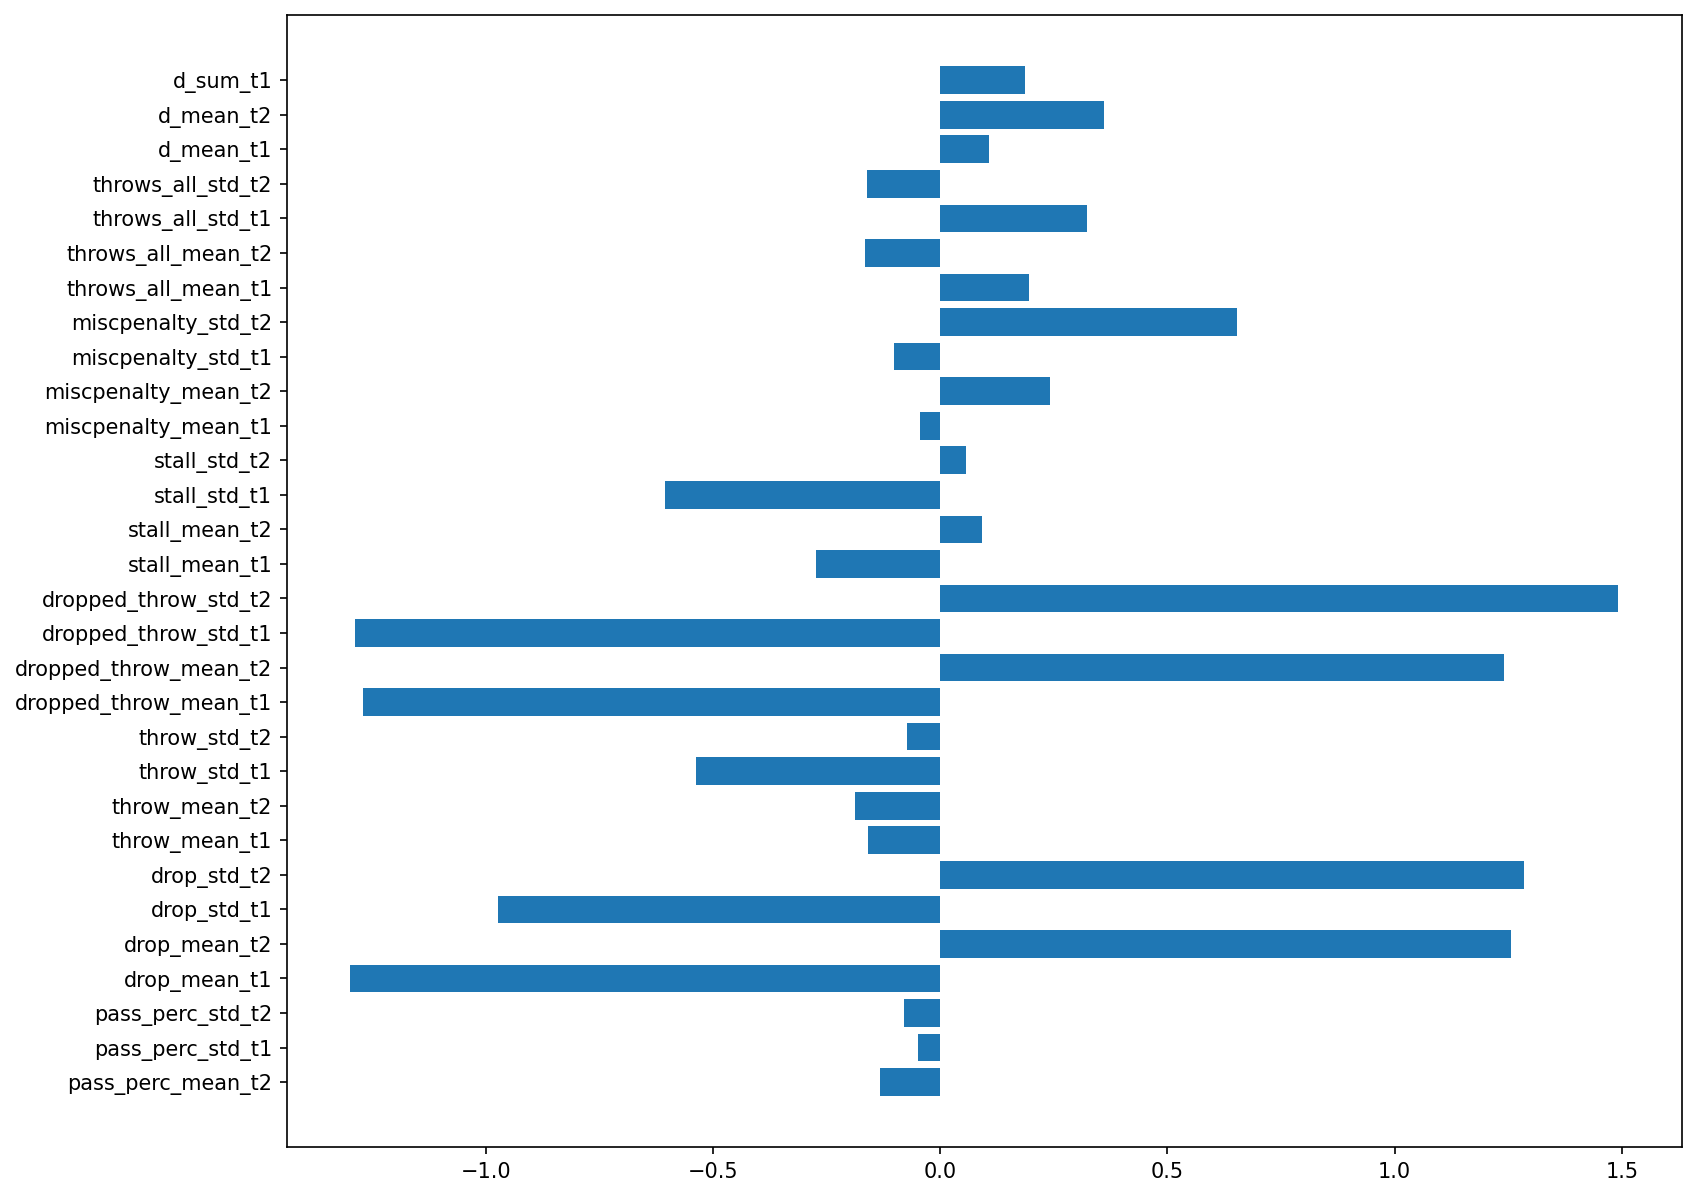

In [52]:
figure(figsize=(12, 10), dpi=150)
plt.barh(range(30), m.coef_[0][5:35])
plt.yticks(range(30), X.columns[5:35])
None

In [53]:
X.columns.shape

(45,)

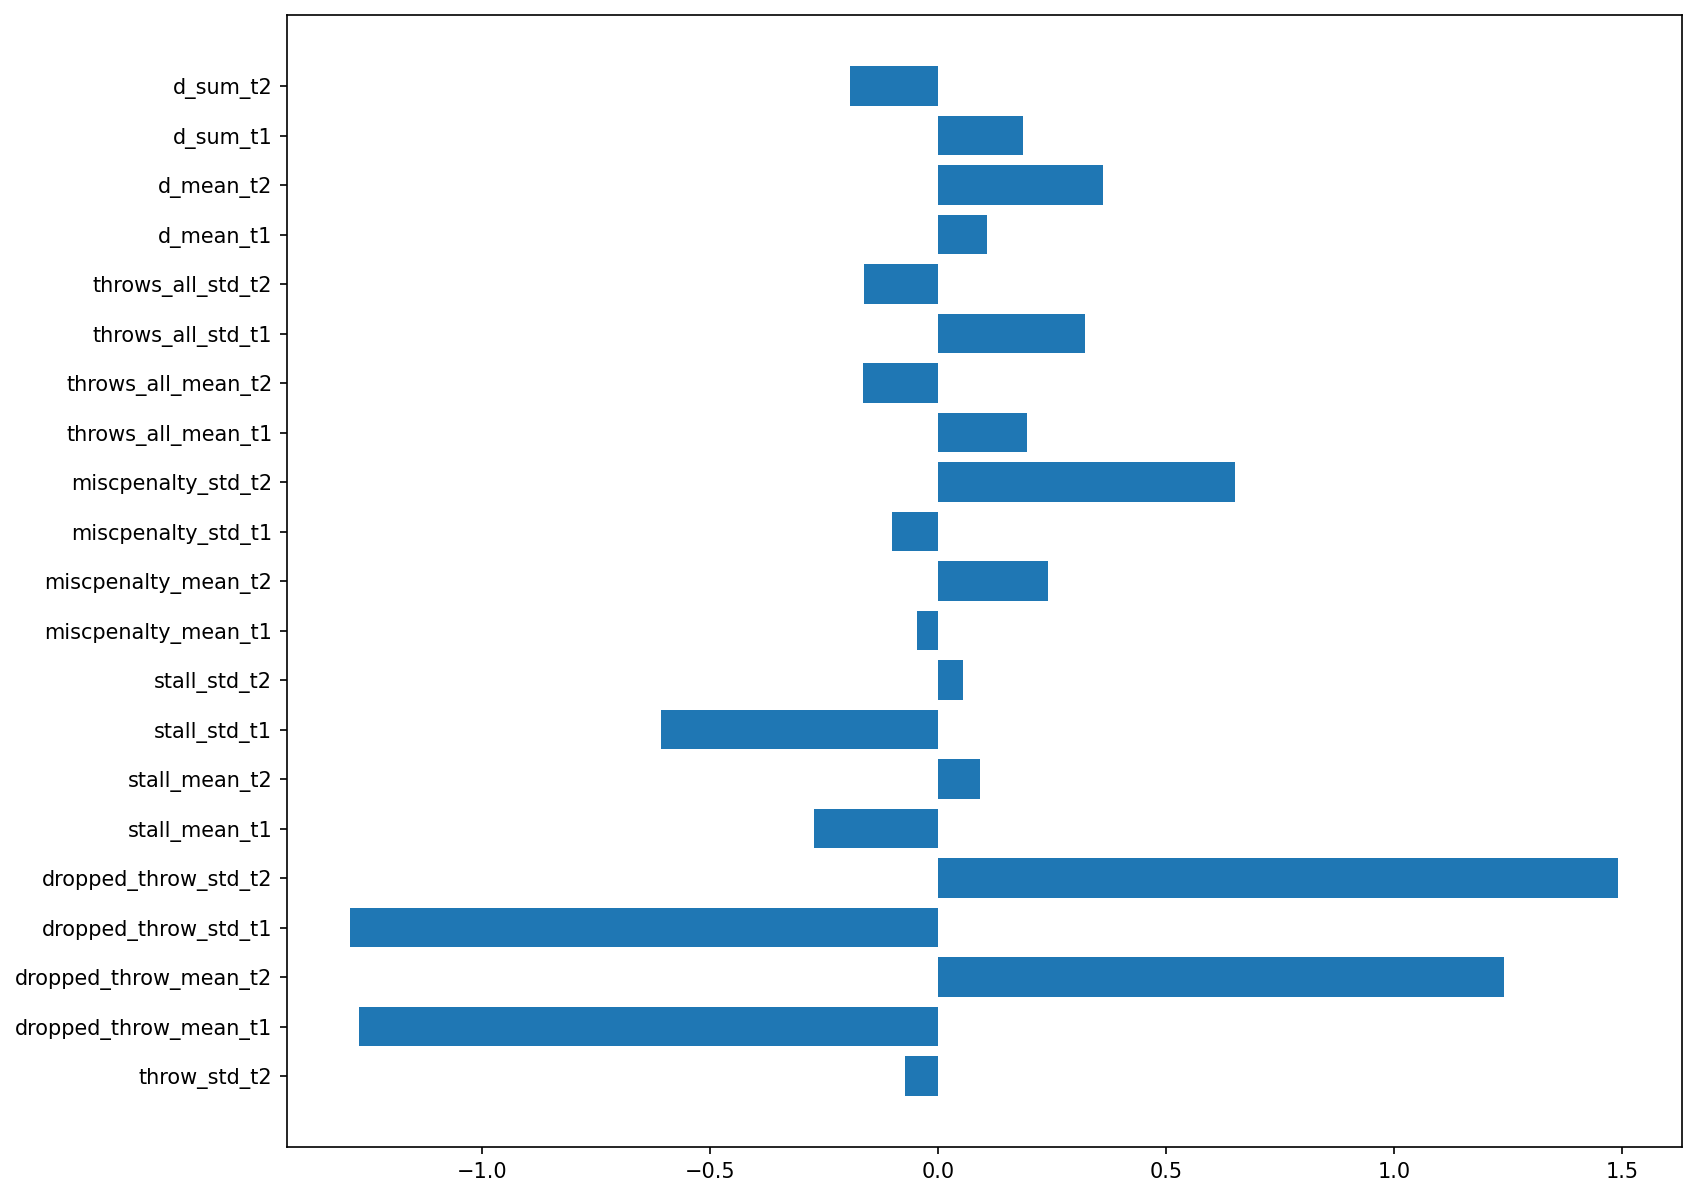

In [54]:
figure(figsize=(12, 10), dpi=150)
plt.barh(range(21), m.coef_[0][15:36])
plt.yticks(range(21), X.columns[15:36])
None

##### Test score

In [55]:
test_score = m.score(X_test, y_test)
test_score

0.9236111111111112

##### Evaluate predictions

In [56]:
ypred = m.predict(X_test)

In [57]:
norm_cm = (confusion_matrix(y_test, ypred) / confusion_matrix(y_test, ypred).sum()) * 100
norm_cm = norm_cm.round(2)

In [58]:
norm_cm

array([[50.69,  2.78],
       [ 4.86, 41.67]])

NameError: name 'data' is not defined

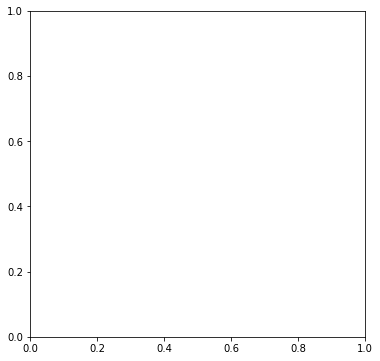

In [59]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

cols = {('False', 'Negative'): '#9a1f40',
        ('True', 'Negative'): '#def4f0',
        ('True', 'Positive'):'#74d4c0', 
        ('False', 'Positive'):'#d9455f'}
x = mosaic(data,[0,1], 
           properties = lambda key: {'color': cols[key]} ,
           ax=ax,gap=0.01)

## Random forest feature importance

In [60]:
rfc = RandomForestClassifier()


In [61]:
rfc.fit(X, y)


RandomForestClassifier()

In [62]:
y_pred = rfc.predict(X_test)

In [63]:
rfc.feature_importances_

array([0.01062108, 0.01087031, 0.01817641, 0.01286081, 0.03668144,
       0.02802902, 0.02066754, 0.01589469, 0.01214027, 0.0222568 ,
       0.01180467, 0.0165194 , 0.01195029, 0.01178253, 0.01671552,
       0.01364351, 0.01847234, 0.0201436 , 0.01511184, 0.01841165,
       0.00445044, 0.00340526, 0.00380342, 0.00550747, 0.00136876,
       0.00255957, 0.00142498, 0.00275221, 0.01230394, 0.00926263,
       0.01900392, 0.01530699, 0.02604266, 0.03550859, 0.04805845,
       0.06552032, 0.01342016, 0.01593974, 0.09230247, 0.09631101,
       0.07181992, 0.0716424 , 0.01480419, 0.01239257, 0.01233422])

[(0.0, 0.1)]

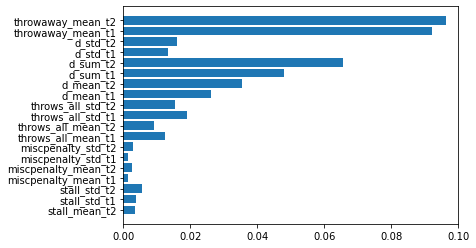

In [75]:
fig, ax = plt.subplots()
plt.barh(X.columns[21:40], rfc.feature_importances_[21:40])
ax.set(xlim=[0, 0.1])

[(0.0, 0.1)]

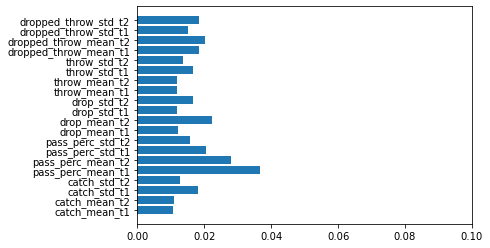

In [74]:
fig, ax = plt.subplots()
ax.barh(X.columns[0:20], rfc.feature_importances_[0:20])
ax.set(xlim=[0, 0.1])

[(0.0, 0.1)]

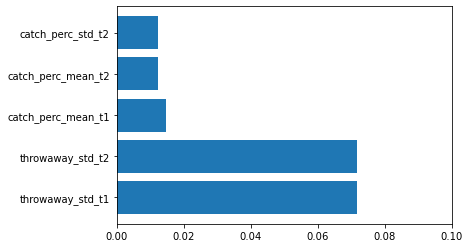

In [73]:
fig, ax = plt.subplots()
ax.barh(X.columns[40:45], rfc.feature_importances_[40:45], align='center')
ax.set(xlim=[0, 0.1])

## Cross-validation

In [76]:
# Logistic regression model 1
cv_all = cross_val_score(m, X, y, cv=10, scoring='accuracy')
cv_mean = cv_all.mean()
cv_std = cv_all.std()
f"Cross-validation mean {cv_mean:5.3f} +- {cv_std:5.3f}"

'Cross-validation mean 0.879 +- 0.034'

<BarContainer object of 10 artists>

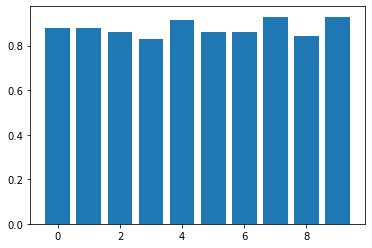

In [77]:
# visualise a distribution of the results
plt.bar(range(10), cv_all)

## Dummy classifier

In [78]:
dummy_clf = DummyClassifier(strategy="most_frequent")


In [79]:
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)


0.5607638888888888